# **คณันสักก์ สุจารีย์ 1634104140001 วต.3-1**

# Lab06 Arbitrary Convolution Filter

https://docs.opencv.org/4.5.2/d4/d13/tutorial_py_filtering.html

## Load Libs

In [1]:
import numpy as np  # import library numpy โดยย่อเป็น np
import cv2 as cv # import library opencv โดยย่อเป็น cv
from matplotlib import pyplot as plt  # import library matplotlib ในส่วนย่อย pyplot โดยย่อเป็น plt

In [2]:
!wget  https://images.unsplash.com/photo-1611915387288-fd8d2f5f928b?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxleHBsb3JlLWZlZWR8MXx8fGVufDB8fHx8&w=1000&q=80
#ดาวน์โหลดไฟล์

--2022-09-22 06:31:54--  https://images.unsplash.com/photo-1611915387288-fd8d2f5f928b?ixlib=rb-1.2.1
Resolving images.unsplash.com (images.unsplash.com)... 146.75.34.208, 2a04:4e42:79::720
Connecting to images.unsplash.com (images.unsplash.com)|146.75.34.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7433092 (7.1M) [image/jpeg]
Saving to: ‘photo-1611915387288-fd8d2f5f928b?ixlib=rb-1.2.1’

photo-1611915387288 100%[===================>]   7.09M  --.-KB/s    in 0.03s   

2022-09-22 06:31:54 (256 MB/s) - ‘photo-1611915387288-fd8d2f5f928b?ixlib=rb-1.2.1’ saved [7433092/7433092]



## Load Image

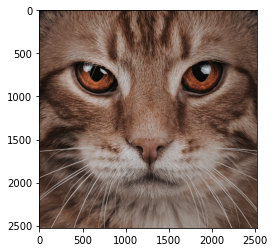

In [3]:
original_img = cv.imread('cat.png') #อ่านไฟล์ SUDOKU.png แล้วเก็บค่าในตัวแปร original_img
RGB_img = cv.cvtColor(original_img, cv.COLOR_BGR2RGB) #แปลงภาพเป็น BGR2RGB
plt.imshow(RGB_img) #แสดงภาพ
plt.show()

# Create Average Kernel

In [4]:
kernel_avg3x3 = np.ones((3,3),np.float32)/9 # Average Kernel 3x3
kernel_avg5x5 = np.ones((5,5),np.float32)/25 # Average Kernel 5x5
kernel_avg7x7 = np.ones((7,7),np.float32)/49 # Average Kernel 7x7
kernel_avg9x9 = np.ones((9,9),np.float32)/81 # Average Kernel 9x9
kernel_avg11x11 = np.ones((11,11),np.float32)/121 # Average Kernel 11x11

In [5]:
print(kernel_avg3x3) #แสดงค่า Fillter kernel_avg3x3

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


# Run and show results of Average Kernel

In [13]:
#นำ 2D Average Filter มาทำ Convolution กับภาพ 
result_avg3x3_img = cv.filter2D(RGB_img,-1,kernel_avg3x3) 
result_avg5x5_img = cv.filter2D(RGB_img,-1,kernel_avg5x5)
result_avg7x7_img = cv.filter2D(RGB_img,-1,kernel_avg7x7)
result_avg9x9_img = cv.filter2D(RGB_img,-1,kernel_avg9x9)
result_avg11x11_img = cv.filter2D(RGB_img,-1,kernel_avg11x11)

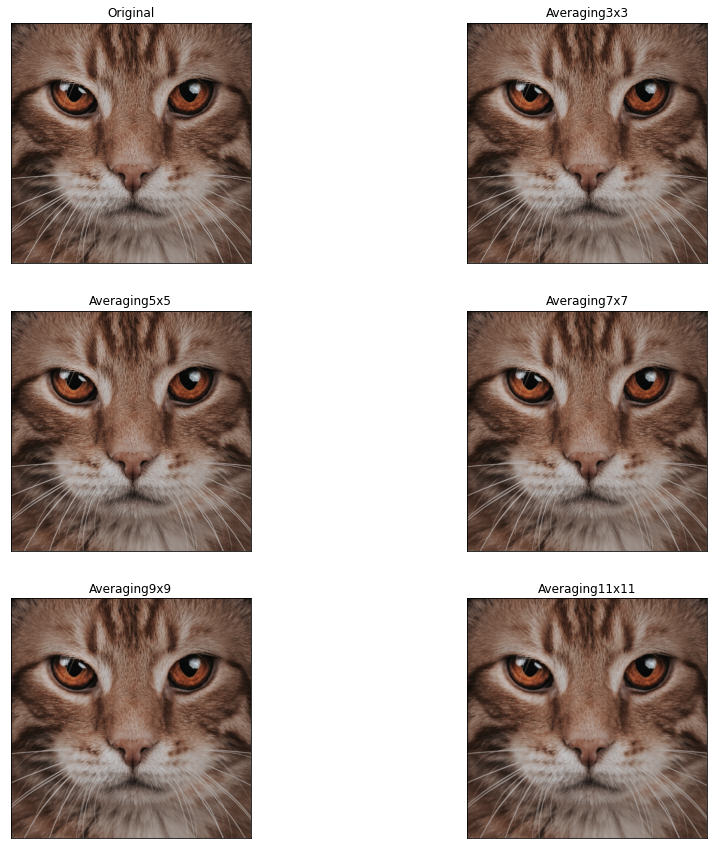

In [14]:
#แสดงผลลัพธ์
plt.rcParams["figure.figsize"] = [15, 15] # กำหนดขนาดภาพ 15x15
plt.subplot(321),plt.imshow(RGB_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(result_avg3x3_img),plt.title('Averaging3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(result_avg5x5_img),plt.title('Averaging5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(result_avg7x7_img),plt.title('Averaging7x7')
plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(result_avg9x9_img),plt.title('Averaging9x9')
plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(result_avg11x11_img),plt.title('Averaging11x11')
plt.xticks([]), plt.yticks([])
plt.show()

## Create My Custom Filter

In [70]:
kernel_sharpen3x3 = np.array([[0,-1,-0,],[-1,5,-1],[0,-1,0]],np.float32) # sharpen 3x3
kernel_sharpen7x7 = np.full((7,7),-1,np.float32) # sharpen 7x7
kernel_sharpen7x7[3,3] = 49 # sharpen 7x7
print(kernel_sharpen3x3)
print(kernel_sharpen7x7)

[[ 0. -1.  0.]
 [-1.  5. -1.]
 [ 0. -1.  0.]]
[[-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. 49. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]]


In [71]:
result_sharpen3x3_img = cv.filter2D(RGB_img,-1,kernel_sharpen3x3)
result_sharpen7x7_img = cv.filter2D(RGB_img,-1,kernel_sharpen7x7)

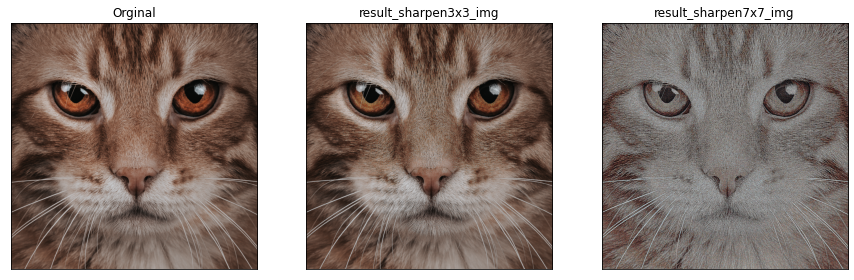

In [72]:
plt.rcParams["figure.figsize"] = [15, 15] # กำหนดขนาดภาพ 15x15
plt.subplot(131),plt.imshow(RGB_img),plt.title('Orginal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(result_sharpen3x3_img),plt.title('result_sharpen3x3_img')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(result_sharpen7x7_img),plt.title('result_sharpen7x7_img')
plt.xticks([]), plt.yticks([])
plt.show()

# Filter ของฉัน

In [ ]:
# สร้างและลองรัน Filter ของนักศึกษาเอง

In [84]:
kernel_sharpen3x3 = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, 0]], np.float32)
kernel_sharpen5x5 = np.full((5,5),-1,np.float32) 
kernel_sharpen5x5[2,2] = 25 # sharpen 5x5
print(kernel_sharpen3x3)
print(kernel_sharpen5x5)

[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1.  0.]]
[[-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. 25. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]]


In [85]:
result_sharpen3x3_img = cv.filter2D(RGB_img,-1,kernel_sharpen3x3)
result_sharpen5x5_img = cv.filter2D(RGB_img,-1,kernel_sharpen5x5)

fillter 1 นี้สามารถทำให้ภาพขัดได้ แต่ผลลัพธ์ที่ได้ภาพสีซีดกว่าภาพต้นฉบับ

fillter 2 ผลลัพธ์ที่ได้ภาพซีดกว่าภาพต้นฉบับมาก

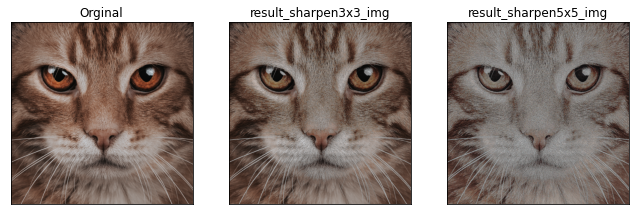

In [87]:
plt.rcParams["figure.figsize"] = [15, 15] # กำหนดขนาดภาพ 15x15
plt.subplot(142),plt.imshow(RGB_img),plt.title('Orginal')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(result_sharpen3x3_img),plt.title('result_sharpen3x3_img')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(result_sharpen5x5_img),plt.title('result_sharpen5x5_img')
plt.xticks([]), plt.yticks([])
plt.show()

fillter เมื่อมีค่าน้อยภาพที่ได้จะมืด แต่เมื่อมีค่ามากภาพที่ได้มีความสว่าง

จากการทดลองภาพที่มีความชัดใกล้เคียงกับต้นฉบับมากที่สุดเป็นภาพที่ 3


 [[-0.33333334 -0.33333334 -0.33333334]
 [-0.33333334  1.6666667  -0.33333334]
 [-0.33333334 -0.33333334  0.        ]]

 [[-0.33333334 -0.33333334 -0.33333334]
 [-0.33333334  2.3333335  -0.33333334]
 [-0.33333334 -0.33333334  0.        ]]

 [[-0.33333334 -0.33333334 -0.33333334]
 [-0.33333334  3.         -0.33333334]
 [-0.33333334 -0.33333334  0.        ]]

 [[-0.33333334 -0.33333334 -0.33333334]
 [-0.33333334  3.6666667  -0.33333334]
 [-0.33333334 -0.33333334  0.        ]]

 [[-0.33333334 -0.33333334 -0.33333334]
 [-0.33333334  4.3333335  -0.33333334]
 [-0.33333334 -0.33333334  0.        ]]

 [[-0.33333334 -0.33333334 -0.33333334]
 [-0.33333334  5.         -0.33333334]
 [-0.33333334 -0.33333334  0.        ]]


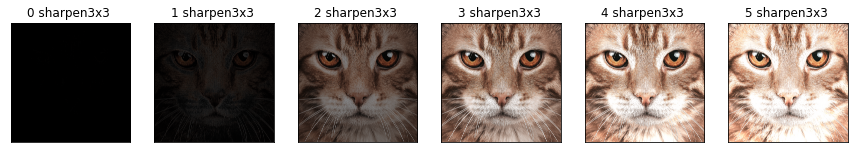

In [114]:
for i in range(6):
    f1=2*i+5
    kernel= np.array([[-1, -1, -1],[-1, f1, -1],[-1, -1, 0]], np.float32) 
    kernel = 1/3 * kernel
    result_sharpen3x3_img = cv.filter2D(RGB_img,-1,kernel)
    plt.subplot(2,6,i+1,title='%d sharpen3x3 '%i,xticks=[],yticks=[])
    plt.imshow(result_sharpen3x3_img)
    print("\n",kernel)